# Introdução à Inteligência Artificial 2021/2022

## Aprendizagem Automática não Supervisionada (3/11 a 20/12)

<img style="transform: rotate(90deg); width:300px" src="especiarias.jpg" alt="Drawing" style="width: 350px;"/>

## Conteúdos

* Aglomeração como aprendizagem não supervisionada
* Aglomeração través de partição dos dados
* O algoritmo de partição K-Means
* Exemplos de dados a 2 dimensões
* O Agrupamento K-means com o scikit-learn
* Medir a semelhança dos pontos
* O K-means como um algoritmo de optimização
* K-Means++ e a sua forma inteligente de escolha dos centros inicias
* Aplicação do K-Means aos dados da Iris
* Usando os grupos para classificar novos dados
* Dados mais difíceis para agrupar
* Mudar a escala dos dados e a sua importância
* Escolhendo o melhor K - analisando a silhueta

## Módulos de Python

Os módulos de Python que iremos usar neste guião são:

* **Scikit-learn:** Este é o módulo principal de aprendizagem automática. Mais detalhes sobre o scikit-learn <a href="https://scikit-learn.org/stable/">aqui</a>.
* **Matplotlib:** Este é o módulo principal para construir gráficos e visualização. Mais detalhes sobre o matplotlib <a href="https://matplotlib.org/">aqui</a>.
* **NumPy:** Este módulo é um dos fundamentais pois contém funcionalidades para arrays multidimensionais, funções matemáticas como por exemplo operações de matrizes da álgebra linear. Mais detalhes sobre o numpy <a href="https://numpy.org/">aqui</a>. Um **array numpy** é uma estrutura de dados fundamental no scikit-learn, sendo o `ndarray` a estrutura principal do numpy. Um `ndarray` significa que tem n dimensões e todos os elementos do array são do mesmo tipo.

## Agupamento como aprendizagem não supervisionada 
Nas aplicações de agrupamento não temos nenhuma informação acerca das classes a que pertencem os pontos. Assim, o objectivo é agrupar os pontos baseando-nos na suas similaridades.

O agrupamento é um conjunto de técnicas usadas para dividir os dados em grupos. Os grupos são conjuntos de dados que são mais semelhantes aos dados do respectivo grupo do que aos dados pertencentes aos outros grupos. 

Exemplos de aplicação de Agrupamento:
* No campo médico, os investigadores aplicam ténicas de agrupamento para experências de expressão genética. Os resultados identificaram grupos de pacientes que respodiam de forma diferenciada aos tratamentos médicos.
* No campo do marketing, aplica-se o agrupamento para a segmentação dos clientes com  histórias semelhantes em termos de aquisições, que as empresas podem usar para criarem campanhas mais focadas nos diferentes grupos.

## Aglomeração través de partição dos dados
Este tipo de aglomeração divide os dados em grupos que não se sobrepõem. Por outras palavras, nenhum objecto pode pertencer a mais do que 1 grupo e cada grupo tem de ter pelo menos 1 elemento dos dados.

Estas técnicas exigem que o utilizador especifique o número de grupos, indicado tipicamente pela variável K. Grande parte dos algoritmos de aglomeração por partição funcionam através de um processo iterativo de afectação dos dados a K grupos. Dois exemplos desse tipo de algoritmos são o K-Means e o K-Medoides.

Estes algoritmos são ambos não determinísticos, significando que podem produzir diferentes agrupamentos em execuções distintas com base no mesmo input e em geral funcionam bem quando os dados têm uma configuração esférica e são escaláveis no que diz respeito à complexidade algorítmica. Possuem também os seus pontos fracos: não se ajustam bem a agrupamentos com formas complexas nem quando possuem uma diversidade de tamanhos e densidades. 

## O algoritmo de partição K-Means
Este algoritmos desenrola-se em 4 passos:

* 1. Escolher K centróides ao acaso entre os pontos que fazem parte do conjunto de dados; esses pontos serão os centros iniciais dos k grupos.

* 2. Atribuir cada ponto ao centróide mais próximo.

* 3. Deslocar os centróides para os centros dos pontos que foram atribuídos a cada um dos k grupos.

* 4. Repetir os passos 2 e 3 até as afectações aos grupos não mudarem ou até ser atingido um número máximo de iterações ou uma tolerância em termos da Soma do Quadrado dos Erros (EQS, que será explicado mais abaixo).


| Exemplo 1     | Exemplo 2     |
| ------------- |:-------------:|
| <img src="toptal-blog-image.gif" alt="Drawing" style="width: 240px;"/>     | <img src="K-means_convergence.gif" alt="Drawing" style="width: 240px;"/> |

## Medir a semelhança entre pontos
Podemos definir a semelhança como o oposto da distância e uma medida comum para medir a distância entre dados com atributos contínuos é a distância Euclidiana no espaço de dimensão m.

Notem que quando aplicamos o k-means a um problema real, as dimensões dos pontos podem ter grandes variações de escala e é conveniente que os atributos sejam medidas na mesma escala. Para isso devemos aplicar um método de normalização dos dados.

## O K-means como um algoritmo de optimização
Baseando-nos nesta métrica da distância Euclidiana, podemos descrever o algoritmo K-Means como executando uma optimização, i.e., um processo iterativo de minimizar a Soma dos Quadrados dos Erros (SQE), que também é chamada de Inércia do Agrupamento. 

Notem que o SQE é uma medida intra-grupos que mede apenas a semelhança dos elementos dentro de cada grupo. Na verdade, corresponde a somar os quadrados das distâncias entre os pontos e os centros dos grupos respectivos (as distâncias são os erros) e que é dada pela fórmula seguinte, em que aparece na sua versão em inglês SSE (Sum Squared Error):

<img src="somaQuadradoErros.PNG" alt="Drawing" style="width: 300px;"/>

em que $u^{(j)}$ é o centróide do grupo j;

e

$w^{(i,j)}$ = 1 se $x^{(i)}$ pertence ao grupo j

$w^{(i,j)}$ = 0 em caso contrário

<img src="kmeans_bad.gif" alt="Drawing" style="width: 500px;"/>

No gif em cima vemos a evolução das partições e também do valor de SQE ao longo das iterações para um conjunto de dados que queremos particionar em 4 grupos. Notem que uma má escolha inicial dos pontos vai levar a uma má partição final, mas o importante é sublinhar que o K-Means realiza uma optimização de SQE, que em geral leva a um óptimo local. Daí a repetição da aplicação do algoritmo para diferentes centróides iniciais.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Exemplo de dados a 2 dimensões
Vamos criar um conjunto de dados artificial de 150 pontos a 2 dimensões, divididos em 3 regiões de densidades equivalentes (50 dados em cada uma delas). O módulo `scikit-learn` inclui vários geradores de dados aleatórios que podem ser utilizados para gerar conjuntos de dados artificiais de um tamanho e complexidade controláveis. Um deles, é o método `make_blobs`, que gera blobs gaussianos isotrópicos especificamente para aglomeração. Se quiserem saber mais sobre o método `make_blobs`, podem seguir a [ligação](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).
Usaremos um `scatter plot` para visualizar o conjunto de dados gerados, sem entrar em pormenores sobre os métodos `scatter` e `show`. Podem consultar mais informações sobre esses métodos e sobre o módulo `matplotlib.pyplot` [aqui](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) e [aqui](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.show.html), respectivamente.

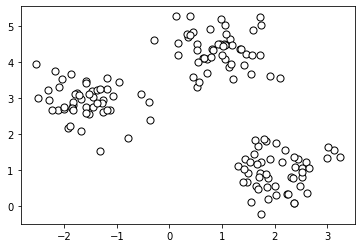

In [2]:
# create dataset
x, y = make_blobs(
    n_samples=150, n_features=2,
    centers=3, cluster_std=0.5,
    shuffle=True, random_state=0
)
plt.scatter(
    x[:,0], x[:,1],
    c='white',marker='o',
    edgecolor='black',s=50
)
plt.show()

## O Agrupamento K-means com o `scikit-learn`
Agora que aprendemos como funciona a versão standard do algoritmo k-means, vamos aplicá-lo ao nosso conjunto de dados que gerámos especialmente para o testar, usando a classe `KMeans` do módulo de agrupamento do scikit-learn.
Vamos construir uma instância da classe KMeans considerando

* uma partição em 3 grupos (`n_clusters`=3), 
* uma inicialização dos centróides aleatória (`init`='random´), 
* um número máximo de iterações de 300 (`max_iter`=300) e também pararemos quando o SQE for menor do que 1e-4 (para fazer melhor!!! este 1x10-4). 
* Vamos indicar que queremos executar uma única vez o K-means (`n_init`=1).

In [3]:
from sklearn.cluster import KMeans
km=KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=300,
    tol=1e-04, random_state=0
)


Vamos executar o k-means sobre os dados, usando o método `fit_predict`.

In [4]:
y_km=km.fit_predict(x)

Vejemos quais os centróides, lendo o atributo da classe `clusters_centers_`. 

In [5]:
km.cluster_centers_

array([[ 0.9329651 ,  4.35420712],
       [ 2.06521743,  0.96137409],
       [-1.5947298 ,  2.92236966]])

e também a soma dos quadrados dos erros, usando o atributo `inertia_`:

In [6]:
km.inertia_

72.47601670996697

E as etiquetas (0, 1 ou 2, porque temos 3 grupos) de cada ponto, na posição correspondente:

In [7]:
km.labels_

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

que é precisamente o que é devolvido pelo método `fit_predict` e que guardámos em y_km

In [8]:
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

Se quisermos ir buscar os pontos de um dos grupos, por exemplos, os de etiqueta 1, podemos fazer:

In [9]:
x[y_km==1]

array([[ 2.60509732,  1.22529553],
       [ 2.61858548,  0.35769791],
       [ 2.37533328,  0.08918564],
       [ 3.1368855 ,  1.56592763],
       [ 1.8706766 ,  0.77797407],
       [ 2.03562611,  0.31361691],
       [ 2.4411628 ,  1.30941574],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.4815332 ,  0.67875364],
       [ 1.68548602,  1.66917096],
       [ 2.989047  ,  1.35068599],
       [ 1.73734448,  1.23588031],
       [ 1.87827057,  0.21018801],
       [ 2.13860427,  1.21517938],
       [ 2.48368283,  0.57215086],
       [ 1.83769075,  1.82229552],
       [ 1.84845803,  0.52393625],
       [ 2.3914149 ,  1.10139458],
       [ 3.01673853,  1.63792106],
       [ 1.62465468,  1.85269614],
       [ 1.44254976,  1.31984515],
       [ 2.52889351,  0.82015861],
       [ 1.5381461 ,  1.23846092],
       [ 1.71810119,  0.91357894],
       [ 1.65356269,  0.55288877],
       [ 2.20438661,  1.56085661],
       [ 3.24683991,  1.3699034 ],
       [ 2.51569693,

Que é formado por 50 elementos.

In [10]:
len(x[y_km==1])

50

Se quisermos ir buscar todas as abcissas dos pontos que foram agrupados no grupo com etiqueta 1, necessário para fazermos o plot dos grupos, como veremos a seguir, faremos:

In [11]:
x[y_km==1,0]

array([2.60509732, 2.61858548, 2.37533328, 3.1368855 , 1.8706766 ,
       2.03562611, 2.4411628 , 2.31690585, 2.36230721, 1.4815332 ,
       1.68548602, 2.989047  , 1.73734448, 1.87827057, 2.13860427,
       2.48368283, 1.83769075, 1.84845803, 2.3914149 , 3.01673853,
       1.62465468, 1.44254976, 2.52889351, 1.5381461 , 1.71810119,
       1.65356269, 2.20438661, 3.24683991, 2.51569693, 2.36788325,
       2.24348029, 1.30963873, 1.70798359, 1.39731382, 2.02114672,
       1.67030948, 2.52997792, 2.00604126, 1.50307585, 1.82750127,
       2.64928242, 1.8062513 , 1.92126584, 1.68289011, 1.40883907,
       1.59885641, 1.73345832, 2.34356293, 2.25327088, 1.55515985])

Analogamente, poderíamos ir buscar o array com as ordenadas dos pontos agrupados no grupo 2 com `x[y_km==2,1]`.

Agora, depois de executarmos a aglomeração em k grupos, cada um com a etiqueta em y_km, vamos visualizar esses grupos juntamente com os respectivos centróides finais. Vamos escolher para a visualização dos pontos de cada grupo, quadrados, bolas e asteriscos e as cores 'lightgreen', 'orange' e 'lightblue', respectivamente. Usaremos o marcador '+' e a cor 'red' para visualizar os 3 centros.

C:\Users\Utilizador\AppData\Local\Temp/ipykernel_20432/2445974907.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


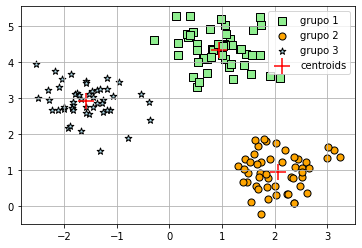

In [12]:
# plot dos 3 grupos

# grupo 1
plt.scatter(
    x[y_km==0,0],x[y_km==0,1],
    s=50, c='lightgreen',
    marker='s',edgecolor='black',
    label='grupo 1'
)

# grupo 2
plt.scatter(
    x[y_km==1,0],x[y_km==1,1],
    s=50, c='orange',
    marker='o',edgecolor='black',
    label='grupo 2'
)

# grupo 3
plt.scatter(
    x[y_km==2,0],x[y_km==2,1],
    s=50, c='lightblue',
    marker='*',edgecolor='black',
    label='grupo 3'
)

# Vamos visualizar os centróides

plt.scatter(
    km.cluster_centers_[:,0],km.cluster_centers_[:,1],
    s=250, marker='+',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### K-means no modo verbose
Durante a execução do algoritmo, podemos acompanhar a evolução da inércia do agrupamento e o número de iterações.

In [13]:
from sklearn.cluster import KMeans
km=KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=300,
    tol=1e-04, random_state=0,
    verbose=1
)
y_km=km.fit_predict(x)

Initialization complete
Iteration 0, inertia 957.9852431116258
Iteration 1, inertia 321.9860278484086
Iteration 2, inertia 81.34329365838244
Iteration 3, inertia 72.47601670996697
Converged at iteration 3: strict convergence.


### Exercício 1
Apliquem o K-means para gerar uma partição num número k de grupos, diferente de 3, por exemplo 2 e 5 grupos. Visualizem os grupos e os centróides. Podem usar o modo verboso se preferirem.

In [14]:
#### solução do exercício 1



## O não determinismo do K-Means
Lembremo-nos que diferentes escolhas para os centros iniciais podem levar a diferentes formas de agrupamento. Quando criámos os dados artificiais fizemos com o propósito de ter 3 agrupamentos naturais. No entanto, haverá alguma outra escolha para os centros iniciais que leva a uma partição em 3 grupos menos natural?


Comecemos por relembrar a divisão nos 3 grupos naturais, que era obtida `random_state`=0. Não precisamos de visualização, apenas de imprimir a soma do quadrado dos erros, que é aproximadamente de 72,476.

In [15]:
from sklearn.cluster import KMeans
km=KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=300,
    tol=1e-04, random_state=0,
    verbose=1
)
y_km=km.fit_predict(x)
print('Soma do quadrados dos erros:',km.inertia_)
print('Os centros:',km.cluster_centers_)

Initialization complete
Iteration 0, inertia 957.9852431116258
Iteration 1, inertia 321.9860278484086
Iteration 2, inertia 81.34329365838244
Iteration 3, inertia 72.47601670996697
Converged at iteration 3: strict convergence.
Soma do quadrados dos erros: 72.47601670996697
Os centros: [[ 0.9329651   4.35420712]
 [ 2.06521743  0.96137409]
 [-1.5947298   2.92236966]]


Podemos controlar a escolha dos centros iniciais através da escolha do parâmetro `random_state`. Por exemplo, se escolhermos o `random_state`=8 sabemos, depois de alguma exploração, que a escolha inicial para os centros irá levar a outro agrupamento. Confirmemos. **Notem que a "seed" (random_state) "poderá dar resultados diferentes" e não ser o valor 8 que vos dá uma partição diferente. Experimentem por exemplo o valor 7.**

In [16]:
from sklearn.cluster import KMeans
km=KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=300,
    tol=1e-04, random_state=8,
    verbose=1
)
y_km=km.fit_predict(x)
print('Soma do quadrados dos erros:',km.inertia_)
print('Os centros:',km.cluster_centers_)

Initialization complete
Iteration 0, inertia 521.9979076874433
Iteration 1, inertia 275.7547392065196
Iteration 2, inertia 274.9022787319337
Iteration 3, inertia 274.8553632302255
Iteration 4, inertia 274.80713380347055
Converged at iteration 4: strict convergence.
Soma do quadrados dos erros: 274.80713380347055
Os centros: [[ 2.5345018   0.95410352]
 [ 1.69649399  0.96708668]
 [-0.33088235  3.63828839]]


Façamos o plot dos 3 grupos.  A observação mostra que a partição
obtida reflete bem os 3 grupos existentes.

C:\Users\Utilizador\AppData\Local\Temp/ipykernel_20432/1194418480.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


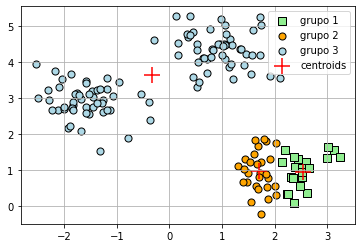

In [17]:
# plot dos 3 grupos

# grupo 1
plt.scatter(
    x[y_km==0,0],x[y_km==0,1],
    s=50, c='lightgreen',
    marker='s',edgecolor='black',
    label='grupo 1'
)

# grupo 2
plt.scatter(
    x[y_km==1,0],x[y_km==1,1],
    s=50, c='orange',
    marker='o',edgecolor='black',
    label='grupo 2'
)

# grupo 3
plt.scatter(
    x[y_km==2,0],x[y_km==2,1],
    s=50, c='lightblue',
    marker='o',edgecolor='black',
    label='grupo 3'
)

# Vamos visualizar os centróides

plt.scatter(
    km.cluster_centers_[:,0],km.cluster_centers_[:,1],
    s=250, marker='+',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### Exercício 2
Apliquem repetidamente o k-means para uma divisão em 3 agrupamentos (k=3), obtendo a SQE. Experimentem vários valores para o `random_state` e verifiquem se encontram outras formas de particionar os dados em 3 grupos. Façam o plot dessas partições distintas das duas que já encontrámos. Basta uma ou duas... Notem que a escala dos eixos do x e do y são diferentes, o que pode criar alguma confusão nos agrupamentos obtidos face aos centros respectivos. 

In [18]:
# solução do exercício 2



### Exercício 3
Automatizem o processo manual pedido no exercício 2. Procurem diferentes formas de particionarem os dados em 3 grupos.
Reduzam a procura, por exemplo, para os primeiros 5000 `random_states`, por exemplo. 

In [19]:
# solução do exercício 3



## Repetição da optimização para diferentes centros iniciais
Se mudarmos o parâmetro `n_init` para um número diferente de 1, por exemplo 10, isso quer dizer que iremos aplicar o k-means 10 vezes, para 10 diferentes escolhas aleatórias para os centros iniciais e que teremos 10 agrupamentos do qual o melhor será escolhdido. E qual o melhor? O melhor é aquele que tiver menos inércia de agrupamento, i.e. que tenha a menor soma dos quadrados dos erros (SQE).
Vamos aplicar o k-means várias vezes para k=3, que já verificámos (no exercício 1) que podemos ter diferentes agrupamentos finais (óptimos locais). Nunca saberemos se o óptimo é global ou não.

Comecemos por criar uma instância do KMeans.

In [20]:
# vamos criar uma instância do k-means, com os parâmetros desejados

km=KMeans(
    n_clusters=3, init='random',
    n_init=1000, max_iter=300,
    tol=1e-04, random_state=0
)

E agora invoquemos o `fit_predict` para executar o K-Means 1000 vezes e escolher a partição com menos soma do quadrado dos erros.

C:\Users\Utilizador\AppData\Local\Temp/ipykernel_20432/2898025084.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


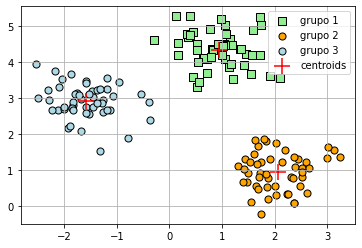

In [21]:

y_km=km.fit_predict(x)

# plot dos 3 grupos
plt.scatter(
    x[y_km==0,0],x[y_km==0,1],
    s=50, c='lightgreen',
    marker='s',edgecolor='black',
    label='grupo 1'
)

plt.scatter(
    x[y_km==1,0],x[y_km==1,1],
    s=50, c='orange',
    marker='o',edgecolor='black',
    label='grupo 2'
)

plt.scatter(
    x[y_km==2,0],x[y_km==2,1],
    s=50, c='lightblue',
    marker='o',edgecolor='black',
    label='grupo 3'
)



# Vamos visualizar os centróides

plt.scatter(
    km.cluster_centers_[:,0],km.cluster_centers_[:,1],
    s=250, marker='+',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

A partição natural é a de menor erro.

### Exercício 4
Usem agora a versão "verbosa", fazendo 10 repetições.

In [22]:
# Solução do exercício 4



### Exercício 5
Este exercício é parecido com o exercício 3. O modo verbose não mostra os vários SQEs e pode ser demasiado verbosa "para o nosso temperamento". Faça uma função que executa N vezes o K-Means mas em que imprima apenas após cada execução os valores da SQE e que mostre o melhor erro obtido.
Esta versão escolhe as "seeds" (`random_state`) de forma aleatória.

In [23]:
## Solução do exercício 5



## K-Means++ e a sua forma inteligente de escolha dos centros inicias

O algorithmo K-Means++ tem uma forma menos ao acaso, ou mais inteligente, de geração dos pontos iniciais:

1. Escolher aleatoriamente um ponto para centro, entre os vários pontos.

2. Para cada ponto ainda não escolhido, calcula-se D(x), a distância entre x e o centro mais próximo, entre os já escolhidos.

3. Escolhe-se para novo centro de acordo com a distribuição de probabilidade ponderada $D^{2}(x)$. No fundo, os pontos mais distantes dos centros mais próximos têm maior probabilidade de serem escolhidos para serem centros.  
Repetir os passos 2 e 3 até que os k centros tenham sido escolhidos


Podemos usar a forma de escolha dos pontos iniciais na classe KMeans, através do parâmetro `ìnit`. Vamos aplicar repetidamente o KMeans, na sua versão "verbosa", para os dados sintéticos que temos usado e para K=3.

Initialization complete
Iteration 0, inertia 432.4574274959722
Iteration 1, inertia 76.2971263639242
Iteration 2, inertia 72.47601670996697
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 125.44666459199156
Iteration 1, inertia 72.59758478616945
Iteration 2, inertia 72.47601670996697
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 88.56851948164748
Iteration 1, inertia 72.47601670996697
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 162.50164041669086
Iteration 1, inertia 74.02366658571603
Iteration 2, inertia 72.47601670996697
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 174.4414004063516
Iteration 1, inertia 72.47601670996697
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 157.88429874795077
Iteration 1, inertia 73.44008404616764
Iteration 2, inertia 72.47601670996697


C:\Users\Utilizador\AppData\Local\Temp/ipykernel_20432/373957530.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


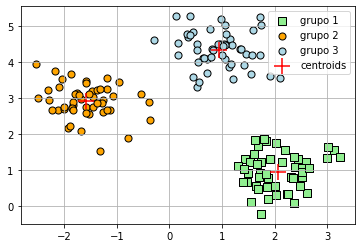

In [24]:
km=KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0,
    verbose=True
)

y_km=km.fit_predict(x)

# plot dos 3 grupos
plt.scatter(
    x[y_km==0,0],x[y_km==0,1],
    s=50, c='lightgreen',
    marker='s',edgecolor='black',
    label='grupo 1'
)

plt.scatter(
    x[y_km==1,0],x[y_km==1,1],
    s=50, c='orange',
    marker='o',edgecolor='black',
    label='grupo 2'
)

plt.scatter(
    x[y_km==2,0],x[y_km==2,1],
    s=50, c='lightblue',
    marker='o',edgecolor='black',
    label='grupo 3'
)



# Vamos visualizar os centróides

plt.scatter(
    km.cluster_centers_[:,0],km.cluster_centers_[:,1],
    s=250, marker='+',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Como podem ver, a inércia inicial é muito menor do que quando usamos uma escolha completamente aleatória para os centros iniciais. Também parece que temos menos iterações até à convergência.

### Exercício 6
Façam exactamente a mesma coisa que no exercício 3, mas agora para o caso de uma inicialização tipo K-Means++. Queremos ver se esta escolha mais inteligente limita o número de partições diferentes que possamos obter.

In [25]:
# solução do exercício 6



## Aplicação do K-Means aos dados das Íris
Vamos usar o exemplo clássico das flores íris, que usámos na PL12.

In [26]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the Iris dataset
iris = load_iris()
print(iris.data.shape)
# for clustering we only want the data not the target attributes
X = iris.data

(150, 4)


Vamos executar o k-means 1000 vezes, na variante K-Means++

In [27]:
# Build an object

km=KMeans(
    n_clusters=3, init='k-means++',
    n_init=1000, max_iter=300,
    tol=1e-04, random_state=0,
)


y_km=km.fit_predict(X)
print('A melhor Inércia:',km.inertia_)
print('Tamanho do grupo 1:',len(x[y_km==0]))
print('Tamanho do grupo 2:',len(x[y_km==1]))
print('Tamanho do grupo 3:',len(x[y_km==2]))

A melhor Inércia: 78.851441426146
Tamanho do grupo 1: 62
Tamanho do grupo 2: 50
Tamanho do grupo 3: 38


## Comparando os grupos com as verdadeiras classes
Podemos medir o grau de semelhança entre as partições obtidas a partir de um algoritmo de agrupamento tal como o k-means e as classes reais, através do `rand-index score` que mede a taxa  de semelhança entre os pares nas classes vs nas partições. No fundo, considerando todos os pares de pontos, devolve a soma dos pares semelhantes correctos com os pares dissemelhantes correctos, sobre o total de pares de pontos (ver figura seguinte). Os pares semelhantes correctos correspondem a pares da ponto que pertencem à mesma classe e que pertencem à mesma partição. Os pares dissemelhantes correctos correspondem aos pares que não pertencem à mesma classe e que também não pertencem à mesma partição.

<img src="rand-index.PNG" alt="Drawing" style="width: 400px;"/>

Eis a definição da função `rand_index_score`.

In [28]:
import numpy as np
from scipy.special import comb

def rand_index_score(clusters, classes):

    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)


Vamos calcular o rand-index da partição obtida antes.

In [29]:
clusters = y_km

classes = iris['target']

score_original=rand_index_score(clusters, classes)
print('Score of original Iris Data:',score_original)


Score of original Iris Data: 0.8797315436241611


Notem que há outras medições da qualidade das partições gerados por  aglomeração com dados já classificados. Usámos apenas o `rand-index score` porque é fácil de ser compreendida. Uma limitação desta medida é que os falsos positivos e os falsos negativos têm igual peso, o que pode ser uma característica indesejável para algumas aplicações de algoritmos de aglomeração. Por exemplo, o [adjusted Rand index](https://en.wikipedia.org/wiki/Rand_index#Adjusted_Rand_index) corrige este problema.

## Usando os grupos para classificar novos dados
Para podermos ter elementos da Íris para serem classificados depois de uma partição, iremos dividir os dados em dois conjuntos, um de treino e outro de teste.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=2)

No conjunto de treino, vamos usar o K-Means para formar as partições. 

In [31]:
km=KMeans(
    n_clusters=3, init='k-means++',
    n_init=1000, max_iter=300,
    tol=1e-04, random_state=0,
)

print('O cojunto de treino tem',len(X_train))
y_km=km.fit_predict(X_train)
print('A melhor Inércia:',km.inertia_)
print('Tamanho do grupo 1:',len(X_train[y_km==0]))
print('Tamanho do grupo 2:',len(X_train[y_km==1]))
print('Tamanho do grupo 3:',len(X_train[y_km==2]))

O cojunto de treino tem 112
A melhor Inércia: 62.131620098039214
Tamanho do grupo 1: 48
Tamanho do grupo 2: 34
Tamanho do grupo 3: 30


Vamos agora calcular o rand-index score da partição obtida com as classes reais:

In [32]:
clusters = y_km

classes = y_train

score=rand_index_score(clusters, classes)
print('Score da partição para treino da Iris Data:',score)


Score da partição para treino da Iris Data: 0.864060489060489


Podemos classificar os dados de teste, usando o método `predict`. O que este método faz é classificar novos pontos nos grupos cujo centróides estão mais próximos.

In [33]:
y_test_km=km.predict(X_test)
print(y_test_km)

[1 1 0 1 1 2 1 2 2 1 1 1 1 1 0 0 1 0 2 0 2 0 2 0 0 1 1 0 1 2 0 1 0 2 0 1 2
 0]


Podemos também verificar quão semelhantes são as classificações reais das flores de teste quando comparadas com as classificações nos grupos gerados pelo K-Means usando o conjunto de treino. 

In [34]:
clusters = y_test_km

classes = y_test

score=rand_index_score(clusters, classes)
print('Score da partição de teste dos dados da Iris:',score)


Score da partição de teste dos dados da Iris: 0.8975817923186344


Notem que estes resultados estão dependentes da partição. Para serem mais consistentes teríamos de fazer várias partições e obter as médias dos 'rand-index scores'.

## Dados mais difíceis para agrupar
Construímos um conjunto artificial que será um desafio para o K-Means, formado por alguns grupos não globulares, algum ruído, no fundo o que contamos quando lidamos com os dados confusos do mundo real. Na verdade, nem tudo é parecido com os dados do mundo real, são de 2 dimensões apenas para ser possível a visualização.

In [35]:
import numpy as np
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [36]:
data = np.load('clusterable_data.npy')

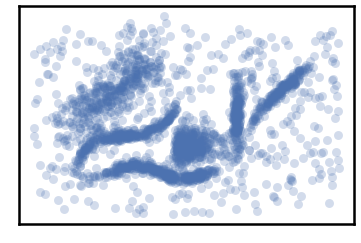

In [37]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [38]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Os grupos encontrados pelo {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'O Agrupamento demorou {:.2f} s'.format(end_time - start_time), fontsize=14)

Vamos invocar o K-Means para uma partição em 6 classes, com os parâmetros por defeito (com o k-means++ para inicializar os centros), em que faremos 1000 execuções.

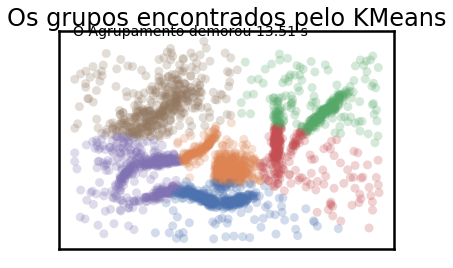

In [39]:
plot_clusters(data, cluster.KMeans, (), {'n_init':1000,'n_clusters':6})

### Exercício 7
Qual a sua opinão sobre a partição feita pelo K-Means? acha que corresponde à partição que acha mais natural?

#### Resposta ao exercício 7


## Mudar a escala dos dados e a sua importância
Notem que os dados podem ter características com várias escalas sendo importante a redução à mesma escala. Por outro lado, o K-Means é "isotrópico" em todas as direcções do espaço e tende a produzir grupos mais ou menos circulares (em vez de grupos alongados). Nesta situação deixar as variâncias desiguais é equivalente a colocar mais importância nos atributos com menos variância. A standardização com o método `StandardScaler` em `preprocessing`, corresponde a deslocar a distribuição de cada atributo de modo a ter uma média de zero e uma variância de 1.

Cada elemento dos dados, um vector de valores, é modificado da seguinte maneira:

$z=\frac{(x-u}{s}$

onde u é o vector média e s é o vector desvio padrão dos dados.

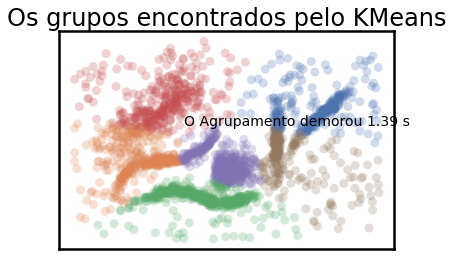

In [40]:
# standardize the data attributes
standardized_data = preprocessing.StandardScaler().fit_transform(data)
plot_clusters(standardized_data, cluster.KMeans, (), {'n_init':100,'n_clusters':6})

Façamos agora uma partição em 10 grupos:

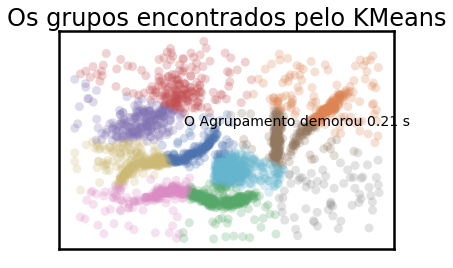

In [41]:
plot_clusters(standardized_data, cluster.KMeans, (), {'n_clusters':10})

## Escolhendo o melhor K - analisando a silhueta
Um dos problemas dos algoritmos de aglomeração por partição é que o utilizador tem que definir à partida quantos grupos pretende (parâmetro K). Para o mesmo K, a soma dos quadrados dos erros é uma forma de comparar a qualidade das várias partições... mas como escolher a melhor partição entre um grupo de partições para diferentes valores de K?

Uma forma utilizada no K-means consiste na [análise da silhueta](https://en.wikipedia.org/wiki/Silhouette_(clustering)), que calcula a distância de separação entre diferentes grupos.  O gráfico da silhueta calcula uma medida de proximidade de cada ponto de um grupo para os pontos dos grupos vizinhos. Essa medida varia no intervalo [-1, 1].  Na realidade, a silhueta combina a distância intra-grupo com a inter-grupos para obter uma medida da qualidade do agrupamento feito. Podem ver mais sobre a silhueta em python [aqui](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

A seguir vamos fazer uma análise da silhueta para os valores de K entre 2 e 7 para o conjunto de dados artificial gerado por `make_blobs` usado no início do guião. Podemos ver que o 'score' mais alto é quando K=3.

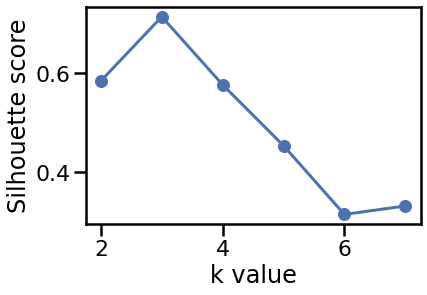

In [42]:
from sklearn.metrics import silhouette_score

x, y = make_blobs(
    n_samples=150, n_features=2,
    centers=3, cluster_std=0.5,
    shuffle=True, random_state=0
)

silh = []
for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04
    )

    y_km = km.fit_predict(x)
    silh.append(silhouette_score(x,y_km))

plt.plot(list(range(2,8)), silh,'bo-')
plt.xlabel('k value') # legenda do eixo dos xx's
plt.ylabel('Silhouette score') # legenda do eixo dos yy's
plt.show()

<img style="transform: rotate(270deg); width:250px" src="box-of-curiosities.jpg" alt="Drawing" style="width: 350px;"/>